<a href="https://colab.research.google.com/github/TemsyToto/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/TemsyChen_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [3]:
import pandas as pd

sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [4]:
#Find the mean

# average = sum(sales)/len(sales)
# average

def meanfinder(x):
  return sum(x)/len(x)

mean = meanfinder(sales)
print(mean)

3052.714285714286


In [5]:
#Find  the variance
#(average of (x-average(sales))**2)/(len(sales)-1)

a = []

def variance(sales):
  for x in sales:
    a.append((x-mean)**2)
  b = sum(a)
  return b/(len(sales)-1)

var_1 = variance(sales)
print(var_1)

214387.90476190473


In [6]:
#Tried another code found online

var_2 = sum([(x - mean)**2 for x in sales]) / (len(sales) -1)
print(var_2)

214387.90476190473


In [7]:
#Checked the answer with the function:
import statistics as stats

var_3 = stats.variance(sales)
var_3

214387.90476190476

In [8]:
#Find standard deviation

c = []

def stand_dev(sales):
  for x in sales:
    c.append((x-mean)**2)
  d = sum(c)
  return ((d/(len(sales)-1))**.5)      

print(stand_dev(sales))

463.0204150595357


In [9]:
#Check with stats function

sd_2 = stats.stdev(sales)
print(sd_2)

463.02041505953576


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [10]:
#Find covariance
#sum((x-xmean)*(y-ymean))/(sample-1)

sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
customers = [127, 80, 105, 92, 120, 115, 93] 

data = {'sales': [3505, 2400, 3027, 2798, 3700, 3250, 2689],
        'customers': [127, 80, 105, 92, 120, 115, 93]
        }

df = pd.DataFrame (data, columns = ['sales','customers'])

print (df)

   sales  customers
0   3505        127
1   2400         80
2   3027        105
3   2798         92
4   3700        120
5   3250        115
6   2689         93


In [11]:
sales_mean = df['sales'].mean()
customers_mean = df['customers'].mean()

df['sales_diff'] = df['sales']-sales_mean
df['customers_diff'] = df['customers']-customers_mean
df['diff_mult'] = df['sales_diff']*df['customers_diff']

print(df)

numerator = df['diff_mult'].sum()
print(numerator)

covariance = numerator/(len(sales)-1)
print(covariance)

   sales  customers  sales_diff  customers_diff     diff_mult
0   3505        127  452.285714       22.428571  10144.122449
1   2400         80 -652.714286      -24.571429  16038.122449
2   3027        105  -25.714286        0.428571    -11.020408
3   2798         92 -254.714286      -12.571429   3202.122449
4   3700        120  647.285714       15.428571   9986.693878
5   3250        115  197.285714       10.428571   2057.408163
6   2689         93 -363.714286      -11.571429   4208.693878
45626.142857142855
7604.357142857142


In [12]:
import numpy as np

covariance_check = np.cov(sales, customers)[0][1]
print(covariance_check)

7604.357142857142


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [13]:
#Find standard deviation of sales and customers

sales_std = df['sales'].std()
customers_std = df['customers'].std()

print(sales_std)
print(customers_std)

463.0204150595357
17.057326313123664


In [14]:
#Find correlation coefficients of sales and customers

correl_coeff = covariance/(sales_std*customers_std)
print(correl_coeff)

0.9628339778148909


In [15]:
#Check with a library function

r = np.corrcoef(sales, customers)[0][1]
print(r)

0.9628339778148909


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [16]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

titanic

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.000000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.916700,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,1306,3.0,0.0,"Zabour, Miss. Thamine",female,29.881135,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN,0
1306,1307,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.500000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN,0
1307,1308,3.0,0.0,"Zakarian, Mr. Ortin",male,27.000000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN,0
1308,1309,3.0,0.0,"Zimmerman, Mr. Leo",male,29.000000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN,0


In [17]:
titanic.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

**Another word for orthogonal is perpendicular**

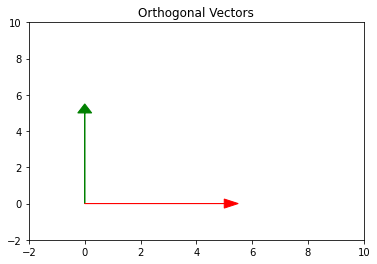

In [18]:
import matplotlib.pyplot as plt

plt.arrow(0,0, 0, 5,head_width=.5, head_length=0.5, color ='green')
plt.arrow(0,0, 5, 0, head_width=.5, head_length=0.5, color ='red')
plt.xlim(-2,10)          
plt.ylim(-2,10)
plt.title("Orthogonal Vectors")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [19]:
#Use the dot product to find if they are orthogonal. Dot product will be zero if they are.

a = [-5,3,7]
b = [6,-8,2]

np.dot(a,b)

-40

**The dot product of a and b is -40, not zero, so they are not orthogonal.**

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [20]:
#Find the norm squared of vector c

c = [2,-15,6,20]
print((np.linalg.norm(c))**2)


665.0


**||c||^2 is the magnitude squared, the answer is 665**


In [21]:
#Find the dot product of c

np.dot(c,c)

665

**c dot c is the dot product, meaning the multiplication of the two rows, with the values added together. It's answer is also 665.**

In [22]:
#Find the transpose of c

c = np.array([[2,-15,6,20]])
c_transpose = c.T
print(c_transpose)

[[  2]
 [-15]
 [  6]
 [ 20]]


In [23]:
#Multiply c transposed with c

c_transpose*c

array([[   4,  -30,   12,   40],
       [ -30,  225,  -90, -300],
       [  12,  -90,   36,  120],
       [  40, -300,  120,  400]])

In [24]:
np.matmul(c_transpose, c)

array([[   4,  -30,   12,   40],
       [ -30,  225,  -90, -300],
       [  12,  -90,   36,  120],
       [  40, -300,  120,  400]])

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1\\0 \end{bmatrix}+ 12\begin{bmatrix} 0\\1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix} = 2\begin{bmatrix} 1\\0\\0 \end{bmatrix} + 11\begin{bmatrix} 0\\1\\0 \end{bmatrix} + -8\begin{bmatrix} 0\\0\\1 \end{bmatrix} = 2\hat{i} + 11\hat{j} + -8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [25]:
#First calculate the norm

f = [4,12,11,9,2]

f_norm = np.linalg.norm(f)
f_norm

19.131126469708992

In [27]:
#Now divide vector f by its norm to turn it into a unit vector

f_unit = f/f_norm
f_unit

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

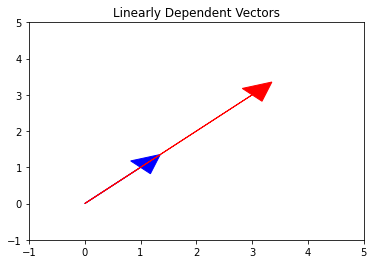

In [31]:
#Plot two vectors that are linearly dependent, try for 3 dimensions.

v1=[1,1]
v2=[3,3]

plt.arrow(0,0,v1[0],v1[1],head_width=.5,head_length=.5,color='blue')
plt.arrow(0,0,v2[0],v2[1], head_width=.5, head_length=.5, color='red')
plt.xlim(-1,5)
plt.ylim(-1,5)
plt.title("Linearly Dependent Vectors")
plt.show;

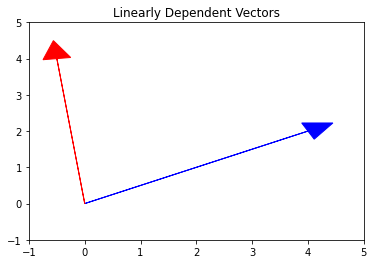

In [32]:
#Plots two vectors that are linearly independent

v3=[4,2]
v4=[-.5,4]

plt.arrow(0,0,v3[0],v3[1],head_width=.5,head_length=.5,color='blue')
plt.arrow(0,0,v4[0],v4[1], head_width=.5, head_length=.5, color='red')
plt.xlim(-1,5)
plt.ylim(-1,5)
plt.title("Linearly Independent Vectors")
plt.show;

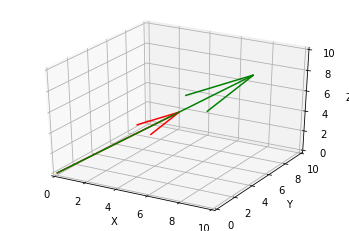

In [38]:
#Plot a 3 dimensional linearly dependent vectors

from mpl_toolkits.mplot3d import Axes3D

vectors = np.array([[0,0,0, 5, 5, 5]])

X, Y, Z, U, V, W = zip(*vectors)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1, colors='red')
ax.quiver(0, 0, 0, 8, 8, 8, length=1, colors='green')
ax.set_xlim([0,10])
ax.set_ylim([0,10])
ax.set_zlim([0,10])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

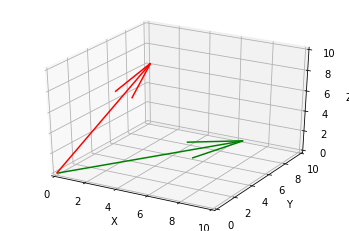

In [40]:
#Plot a 3 dimensional linearly independent vectors

vectors = np.array([[0,0,0, 2, 7, 8]])

X, Y, Z, U, V, W = zip(*vectors)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1, colors='red')
ax.quiver(0, 0, 0, 8, 7, 2, length=1, colors='green')
ax.set_xlim([0,10])
ax.set_ylim([0,10])
ax.set_zlim([0,10])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [47]:
#Calculate if vectors g and h are linearly independent by finding if the determinant = 0

g = [1,2]
h=[4,8]
gh = np.array([g,h])

gh_det = np.linalg.det(gh)
gh_det

0.0

**Vectors g and h are linearly dependent, they are a number line. The span of g and h is a 1 dimensional line.**

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [48]:
#Find determinant

l = [1,2,3]
m=[-1,0,7]
n=[4,8,2]

lmn = np.array([l,m,n])

lmn_det = np.linalg.det(lmn)
lmn_det

#Determinant is ~-20. 

-19.999999999999996

In [ ]:
#Find the rank using a row-echelon form
1 2 3
-1 0 7
4 8 2


\begin{align}
lmn_0 = \begin{bmatrix}
  1 & 2 & 3 \\
  -1 & 0 & 7 \\
  4 & 8 & 2 
 \end{bmatrix}
\end{align}

\begin{align}
lmn_1 = \begin{bmatrix}
  1 & 2 & 3 \\
  4 & 8 & 2 \\
  -1 & 0 & 7 
 \end{bmatrix}
\end{align}

\begin{align}
lmn_2 = \begin{bmatrix}
  1 & 2 & 3 \\
  0 & 0 & -10 \\
  0 & 2 & 7.5 
 \end{bmatrix}
\end{align}

\begin{align}
lmn_2 = \begin{bmatrix}
  1 & 2 & 3 \\
  0 & 2 & 7.5\\
  0 & 0 & -10 \\
 \end{bmatrix}
\end{align}

\begin{align}
lmn_2 = \begin{bmatrix}
  1 & 2 & 3 \\
  0 & 1 & 3.75\\
  0 & 0 & -10 \\
 \end{bmatrix}
\end{align}

\begin{align}
lmn_2 = \begin{bmatrix}
  1 & 2 & 3 \\
  0 & 1 & 3.75\\
  0 & 0 & 1 \\
 \end{bmatrix}
\end{align}

**The rank of l, m, and n if put into a matrix is rank 3, so they are 3 linearly independent vectors. Their span is every point in a 3 dimensional plane**

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



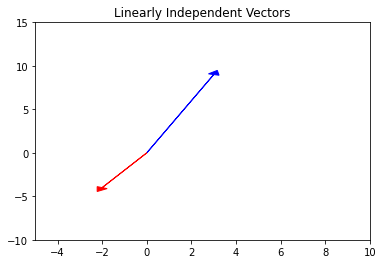

In [56]:
#Plots two vectors that are linearly independent

v3=[3,9]
v4=[-2,-4]

plt.arrow(0,0,v3[0],v3[1],head_width=.5,head_length=.5,color='blue')
plt.arrow(0,0,v4[0],v4[1], head_width=.5, head_length=.5, color='red')
plt.xlim(-5,10)
plt.ylim(-10,15)
plt.title("Linearly Independent Vectors")
plt.show;

## 6.2 What does it mean to form a basis?

**Forming a basis means that a set of vectors span a space, establish what the space is.**

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}
\begin{align}
P = \begin{bmatrix} 
 -1 & 0 & 7 \\
 1 & 2 & 3 \\
 4 & 8  & 2
\end{bmatrix}
\end{align}
\begin{align}
P = \begin{bmatrix} 
 1 & 0 & -7 \\
 1 & 2 & 3 \\
 4 & 8  & 2
\end{bmatrix}
\end{align}
\begin{align}
P = \begin{bmatrix} 
 1 & 0 & -7 \\
 0 & 2 & 10 \\
 4 & 8  & 2
\end{bmatrix}
\end{align}
**I think it's rank 3. I tried to do Gaussian Elimination, but I couldn't get it to reach reduced row echelon form.**

## 7.2 What does the rank of a matrix tell us?

**The rank of a matrix tells us how many columns are linearly independent, which tells us what the span of the basis vectors is**


# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

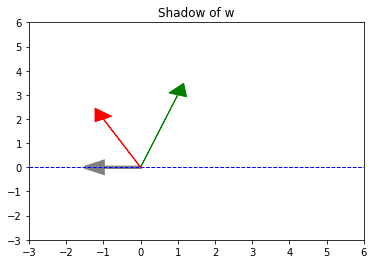

In [67]:
#Axis bounds
plt.xlim(-3,6)
plt.ylim(-3,6)

#Vectors
v=[1,3]
w=[-1,2]
proj=[-1,0]

# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

#Plot vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.5, head_length=0.5, color ='gray')
plt.arrow(0,0,v[0],v[1],head_width=.5,head_length=.5,color='green')
plt.arrow(0,0,w[0],w[1], head_width=.5, head_length=.5, color='red')
plt.title("Shadow of w")
plt.show;

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

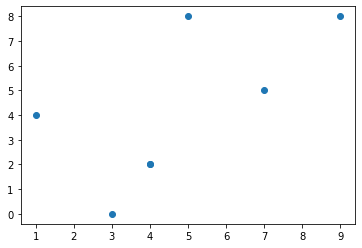

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()